In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 

In [11]:
df = pd.read_csv('SaratogaHouses.csv')
df.head()

,Unnamed: 0,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
0,1,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No
1,2,181115,0.92,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No,No,No
2,3,109000,0.19,133,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No,No
3,4,155000,0.41,13,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No,No,No
4,5,86060,0.11,0,15000,840,51,2,0,1.0,3,hot air,gas,public/commercial,No,Yes,Yes


In [12]:
threshold = df['price'].median()

In [13]:
df['price_category'] = (df['price']>threshold).astype(int)

In [14]:
df['price_category'].value_counts()

price_category
0    866
1    862
Name: count, dtype: int64

In [15]:
X = df[['lotSize','age','landValue','livingArea','bedrooms','bathrooms']]
y = df['price_category']

In [16]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
model = LogisticRegression()
model.fit(X_train, y_train)

c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
y_pred = model.predict(X_test)

In [20]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy*100)

Accuracy: 83.23699421965318


In [21]:
print("Classification Report",classification_report(y_test, y_pred))

Classification Report               precision    recall  f1-score   support

           0       0.83      0.85      0.84       179
           1       0.84      0.81      0.82       167

    accuracy                           0.83       346
   macro avg       0.83      0.83      0.83       346
weighted avg       0.83      0.83      0.83       346



In [22]:
#confusion maxtrix

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[153  26]
 [ 32 135]]


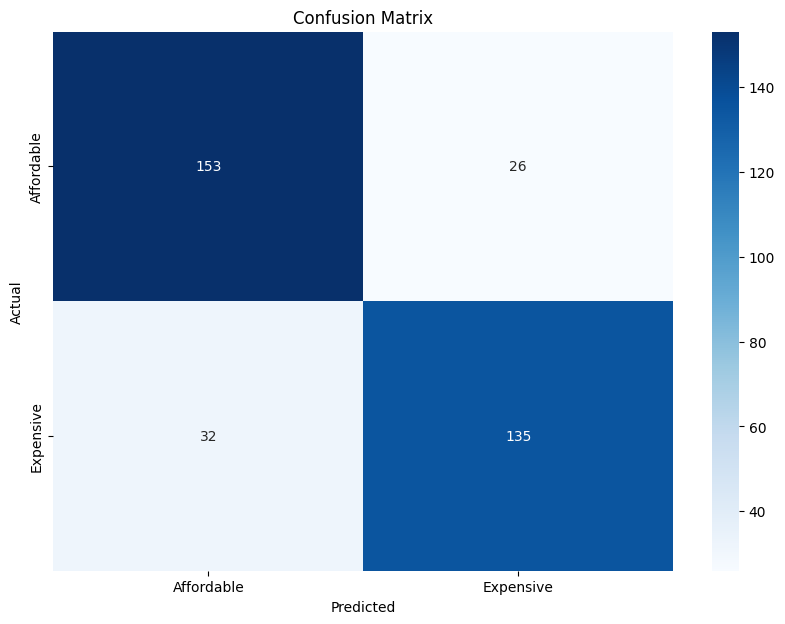

In [23]:
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix,cmap="Blues",xticklabels=["Affordable","Expensive"],yticklabels=["Affordable","Expensive"],annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()